In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("../benchmark-webservice/obs_out/results/G_STD2_Luca/G_STD2_Luca.csv")


In [50]:
df

,participant_id,metric_x,stderr_x,metric_y,stderr_y
0,Ab initio (Augustus),1462,73.838981,0.274184,0.011777
1,Ab initio OF,10526,178.672750,0.348810,0.008634
2,UniProt,8402,163.869690,0.220524,0.007104
3,UniProt OF,16954,207.475400,0.237190,0.007211
4,NCBI,14277,197.953650,0.215667,0.006814
5,NCBI OF,19719,214.189720,0.205762,0.006460
6,NCBI (primary assembly),14176,197.530860,0.216286,0.007014
7,NCBI (primary assembly) OF,19779,214.302700,0.209667,0.006493
8,Ensembl,9271,170.328070,0.224905,0.007099
9,Ensembl OF,14567,199.140730,0.230571,0.006782


## Main text

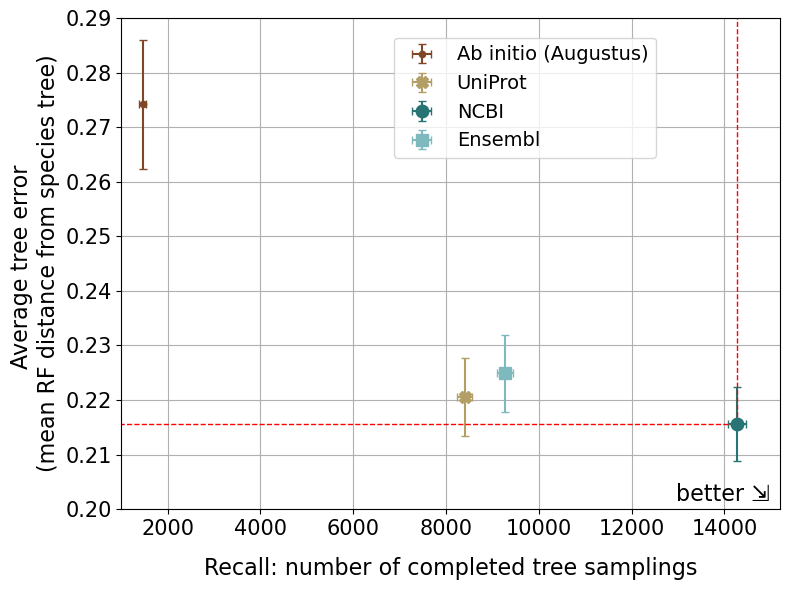

In [111]:
import matplotlib.lines as mlines
# Option 1: Select specific participant IDs
participants_to_plot = [
    "Ab initio (Augustus)", "UniProt", "NCBI", "Ensembl"
]
df = df[df["participant_id"].isin(participants_to_plot)]


# === CUSTOMIZE STYLES HERE ===
style_map = {
    "Ab initio (Augustus)": {"facecolor": "#804726", "edgecolor":"#804726", "marker": "."},
    "UniProt": {"facecolor": "#b39e66", "edgecolor": "#b39e66", "marker": "X"},
    "NCBI": {"facecolor": "#287373", "edgecolor": "#287373", "marker": "o"},
    "Ensembl": {"facecolor": "#7eb9bd", "edgecolor": "#7eb9bd" ,"marker": "s"},
}

# Plot
plt.figure(figsize=(8,6))
for _, row in df.iterrows():
    style = style_map.get(row["participant_id"], {"color": "black", "marker": "o"})
    plt.errorbar(
        row["metric_x"], row["metric_y"],
        xerr=row["stderr_x"], yerr=row["stderr_y"],
        fmt=style["marker"], 
        markerfacecolor=style.get("facecolor", style["facecolor"]),
        markeredgecolor=style.get("edgecolor", style["edgecolor"]),
        color= style["edgecolor"],
        markersize=9,
        label=row["participant_id"] if row["participant_id"] not in plt.gca().get_legend_handles_labels()[1] else "",
        capsize=3
    )

# Get best point
best_row_y = df.loc[df["metric_y"].idxmin()]  # Smallest y = best
best_row_x = df.loc[df["metric_x"].idxmax()] # Biggest x = best
besty_x = best_row_y["metric_x"]
besty_y = best_row_y["metric_y"]
bestx_y = best_row_x["metric_y"]
bestx_x= best_row_x["metric_x"]

# Horizontal line: from left to best_y's x
plt.plot([0, besty_x], [besty_y, besty_y], linestyle="--", color="red", linewidth=1)

# Vertical line: from best_x's y to top
plt.plot([bestx_x, bestx_x], [bestx_y, 0.5], linestyle="--", color="red", linewidth=1)

plt.plot([bestx_x, besty_x], [bestx_y, besty_y], color="black", linestyle="--", linewidth=1)  # small vertical line

# Optional: add a text annotation near the corner
plt.text(besty_x * 1.05, bestx_y * 0.93 , "better ⇲", color="black", fontsize=16, ha="right", va="bottom")


plt.xlim(1000,)
plt.ylim(0.20,0.29)
plt.xlabel("Recall: number of completed tree samplings", fontsize=16, labelpad=13)
plt.ylabel("Average tree error \n(mean RF distance from species tree)", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(0.4, 0.98), loc='upper left', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('../benchmark-webservice/obs_out/results/G_STD2_Luca/Benchmark_maintext.svg', dpi=600)

## Primary vs top level assembly OMA

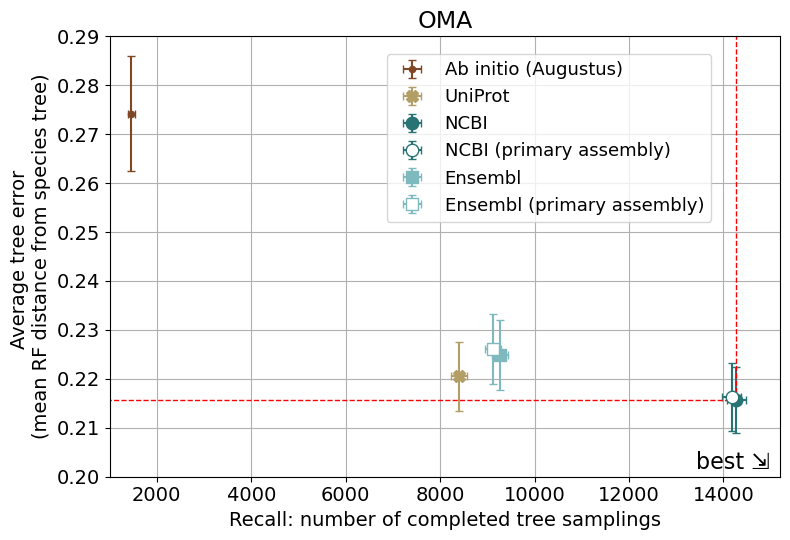

In [72]:
# Option 1: Select specific participant IDs
participants_to_plot = [
    "Ab initio (Augustus)", "UniProt", "NCBI", "NCBI (primary assembly)", "Ensembl", "Ensembl (primary assembly)"
]
df = df[df["participant_id"].isin(participants_to_plot)]

# === CUSTOMIZE STYLES HERE ===
style_map = {
    "Ab initio (Augustus)": {"facecolor": "#804726", "edgecolor":"#804726", "marker": "."},
    "UniProt": {"facecolor": "#b39e66", "edgecolor": "#b39e66", "marker": "X"},
    "NCBI": {"facecolor": "#287373", "edgecolor": "#287373", "marker": "o"},
    "NCBI (primary assembly)": {"facecolor": "w",  "edgecolor": "#287373", "marker": "o"},
    "Ensembl": {"facecolor": "#7eb9bd", "edgecolor": "#7eb9bd" ,"marker": "s"},
    "Ensembl (primary assembly)": {"facecolor": "w", "edgecolor": "#7eb9bd", "marker": "s"}
}

# Plot
plt.figure(figsize=(8,5.5))
for _, row in df.iterrows():
    style = style_map.get(row["participant_id"], {"color": "black", "marker": "o"})
    plt.errorbar(
        row["metric_x"], row["metric_y"],
        xerr=row["stderr_x"], yerr=row["stderr_y"],
        fmt=style["marker"], 
        markerfacecolor=style.get("facecolor", style["facecolor"]),
        markeredgecolor=style.get("edgecolor", style["edgecolor"]),
        color= style["edgecolor"],
        markersize=9,
        label=row["participant_id"] if row["participant_id"] not in plt.gca().get_legend_handles_labels()[1] else "",
        capsize=3
    )
# Get best point
best_row_y = df.loc[df["metric_y"].idxmin()]  # Smallest y = best
best_row_x = df.loc[df["metric_x"].idxmax()] # Biggest x = best
besty_x = best_row_y["metric_x"]
besty_y = best_row_y["metric_y"]
bestx_y = best_row_x["metric_y"]
bestx_x= best_row_x["metric_x"]

# Horizontal line: from left to best_y's x
plt.plot([0, besty_x], [besty_y, besty_y], linestyle="--", color="red", linewidth=1)

# Vertical line: from best_x's y to top
plt.plot([bestx_x, bestx_x], [bestx_y, 0.5], linestyle="--", color="red", linewidth=1)

plt.plot([bestx_x, besty_x], [bestx_y, besty_y], color="black", linestyle="--", linewidth=1)  # small vertical line

# Optional: add a text annotation near the corner
plt.text(besty_x * 1.05, bestx_y * 0.93 , "best ⇲", color="black", fontsize=16, ha="right", va="bottom")


plt.xlim(1000,)
plt.ylim(0.20,0.29)
plt.xlabel("Recall: number of completed tree samplings", fontsize=14)
plt.ylabel("Average tree error \n(mean RF distance from species tree)", fontsize=14)
plt.title("OMA", fontsize=17, pad=6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(0.4, 0.98), loc='upper left', fontsize=13)
plt.grid(True)
plt.tight_layout()
plt.savefig('../benchmark-webservice/obs_out/results/G_STD2_Luca/Prim_vs_top_OMA.jpg', dpi=600)

## Primary vs toplevel OF

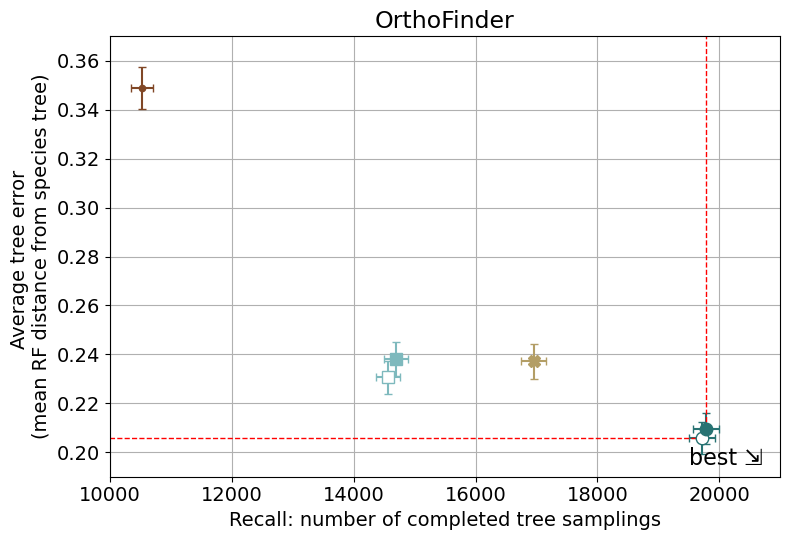

In [89]:
import matplotlib.lines as mlines
# Option 1: Select specific participant IDs
participants_to_plot = [
    "Ab initio OF", "UniProt OF", "NCBI OF", "NCBI (primary assembly) OF", "Ensembl OF", "Ensembl (primary assembly) OF"
]
df = df[df["participant_id"].isin(participants_to_plot)]


# === CUSTOMIZE STYLES HERE ===
style_map = {
    "Ab initio OF": {"facecolor": "#804726", "edgecolor":"#804726", "marker": "."},
    "UniProt OF": {"facecolor": "#b39e66", "edgecolor": "#b39e66", "marker": "X"},
    "NCBI (primary assembly) OF": {"facecolor": "#287373", "edgecolor": "#287373", "marker": "o"},
    "NCBI OF": {"facecolor": "w",  "edgecolor": "#287373", "marker": "o"},
    "Ensembl (primary assembly) OF": {"facecolor": "#7eb9bd", "edgecolor": "#7eb9bd" ,"marker": "s"},
    "Ensembl OF": {"facecolor": "w", "edgecolor": "#7eb9bd", "marker": "s"}
}

# Plot
plt.figure(figsize=(8,5.5))
for _, row in df.iterrows():
    style = style_map.get(row["participant_id"], {"color": "black", "marker": "o"})
    plt.errorbar(
        row["metric_x"], row["metric_y"],
        xerr=row["stderr_x"], yerr=row["stderr_y"],
        fmt=style["marker"], 
        markerfacecolor=style.get("facecolor", style["facecolor"]),
        markeredgecolor=style.get("edgecolor", style["edgecolor"]),
        color= style["edgecolor"],
        markersize=9,
        label=row["participant_id"] if row["participant_id"] not in plt.gca().get_legend_handles_labels()[1] else "",
        capsize=3
    )

# Get best point
best_row_y = df.loc[df["metric_y"].idxmin()]  # Smallest y = best
best_row_x = df.loc[df["metric_x"].idxmax()] # Biggest x = best
besty_x = best_row_y["metric_x"]
besty_y = best_row_y["metric_y"]
bestx_y = best_row_x["metric_y"]
bestx_x= best_row_x["metric_x"]

# Horizontal line: from left to best_y's x
plt.plot([0, besty_x], [besty_y, besty_y], linestyle="--", color="red", linewidth=1)

# Vertical line: from best_x's y to top
plt.plot([bestx_x, bestx_x], [bestx_y, 0.5], linestyle="--", color="red", linewidth=1)

plt.plot([bestx_x, besty_x], [bestx_y, besty_y], color="black", linestyle="--", linewidth=1)  # small vertical line

# Optional: add a text annotation near the corner
plt.text(besty_x * 1.05, bestx_y * 0.92 , "best ⇲", color="black", fontsize=16, ha="right", va="bottom")


plt.xlim(10000,)
plt.ylim(0.19,0.37)
plt.xlabel("Recall: number of completed tree samplings", fontsize=14)
plt.ylabel("Average tree error \n(mean RF distance from species tree)", fontsize=14)
plt.title("OrthoFinder", fontsize=17, pad=6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(bbox_to_anchor=(0.4, 0.98), loc='upper left', fontsize=13)
plt.grid(True)
plt.tight_layout()
plt.savefig('../benchmark-webservice/obs_out/results/G_STD2_Luca/Prim_vs_top_OrthoFinder.svg')

## Long Isos- best conserved OF

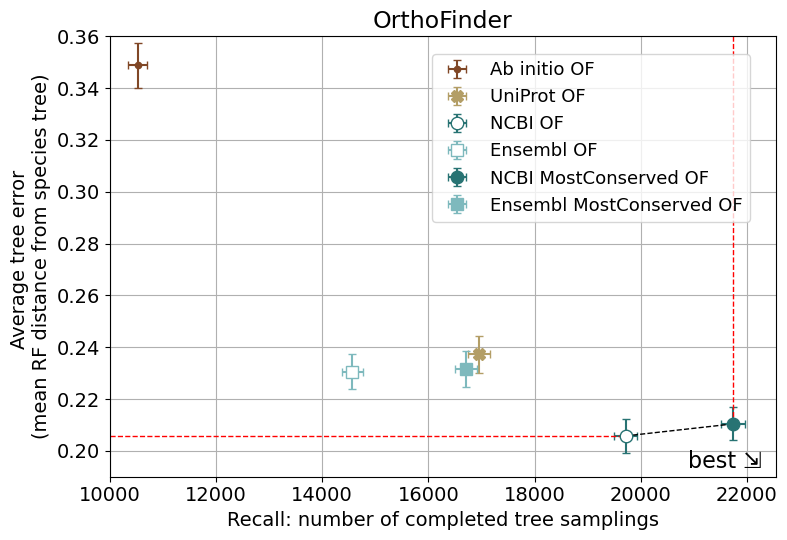

In [91]:
import matplotlib.lines as mlines
# Option 1: Select specific participant IDs
participants_to_plot = [
    "Ab initio OF", "UniProt OF", "NCBI OF", "NCBI MostConserved OF", "Ensembl OF", "Ensembl MostConserved OF"
]
df = df[df["participant_id"].isin(participants_to_plot)]


# === CUSTOMIZE STYLES HERE ===
style_map = {
    "Ab initio OF": {"facecolor": "#804726", "edgecolor":"#804726", "marker": "."},
    "UniProt OF": {"facecolor": "#b39e66", "edgecolor": "#b39e66", "marker": "X"},
    "NCBI MostConserved OF": {"facecolor": "#287373", "edgecolor": "#287373", "marker": "o"},
    "NCBI OF": {"facecolor": "w",  "edgecolor": "#287373", "marker": "o"},
    "Ensembl MostConserved OF": {"facecolor": "#7eb9bd", "edgecolor": "#7eb9bd" ,"marker": "s"},
    "Ensembl OF": {"facecolor": "w", "edgecolor": "#7eb9bd", "marker": "s"}
}

# Plot
plt.figure(figsize=(8,5.5))
for _, row in df.iterrows():
    style = style_map.get(row["participant_id"], {"color": "black", "marker": "o"})
    plt.errorbar(
        row["metric_x"], row["metric_y"],
        xerr=row["stderr_x"], yerr=row["stderr_y"],
        fmt=style["marker"], 
        markerfacecolor=style.get("facecolor", style["facecolor"]),
        markeredgecolor=style.get("edgecolor", style["edgecolor"]),
        color= style["edgecolor"],
        markersize=9,
        label=row["participant_id"] if row["participant_id"] not in plt.gca().get_legend_handles_labels()[1] else "",
        capsize=3
    )

# Get best point
best_row_y = df.loc[df["metric_y"].idxmin()]  # Smallest y = best
best_row_x = df.loc[df["metric_x"].idxmax()] # Biggest x = best
besty_x = best_row_y["metric_x"]
besty_y = best_row_y["metric_y"]
bestx_y = best_row_x["metric_y"]
bestx_x= best_row_x["metric_x"]

# Horizontal line: from left to best_y's x
plt.plot([10000, besty_x], [besty_y, besty_y], linestyle="--", color="red", linewidth=1)

# Vertical line: from best_x's y to top
plt.plot([bestx_x, bestx_x], [bestx_y, 0.36], linestyle="--", color="red", linewidth=1)

plt.plot([bestx_x, besty_x], [bestx_y, besty_y], color="black", linestyle="--", linewidth=1)  # small vertical line

# Optional: add a text annotation near the corner
plt.text(besty_x * 1.13, bestx_y * 0.91, "best ⇲", color="black", fontsize=16, ha="right", va="bottom")


plt.xlim(10000,)
plt.ylim(0.19,0.36)
plt.xlabel("Recall: number of completed tree samplings", fontsize=14)
plt.ylabel("Average tree error \n(mean RF distance from species tree)", fontsize=14)
plt.title("OrthoFinder", fontsize=17, pad=6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(0.47, 0.98), loc='upper left', fontsize=13)
plt.grid(True)
plt.tight_layout()
plt.savefig('../benchmark-webservice/obs_out/results/G_STD2_Luca/ConservedIsos-OrthoFinder.svg')

## Long Isos vs. Most Conserved OMA

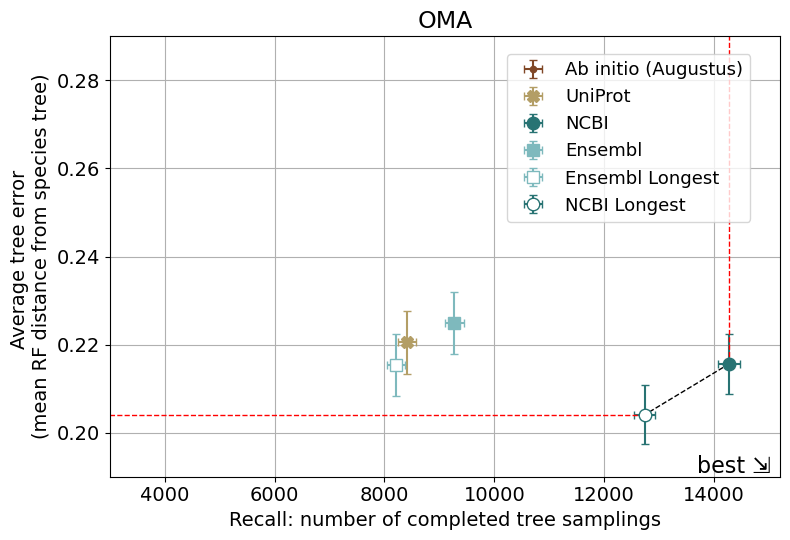

In [87]:
# Option 1: Select specific participant IDs
participants_to_plot = [
    "Ab initio (Augustus)", "UniProt", "NCBI", "NCBI Longest", "Ensembl", "Ensembl Longest"
]
df = df[df["participant_id"].isin(participants_to_plot)]

# === CUSTOMIZE STYLES HERE ===
style_map = {
    "Ab initio (Augustus)": {"facecolor": "#804726", "edgecolor":"#804726", "marker": "."},
    "UniProt": {"facecolor": "#b39e66", "edgecolor": "#b39e66", "marker": "X"},
    "NCBI": {"facecolor": "#287373", "edgecolor": "#287373", "marker": "o"},
    "NCBI Longest": {"facecolor": "w",  "edgecolor": "#287373", "marker": "o"},
    "Ensembl": {"facecolor": "#7eb9bd", "edgecolor": "#7eb9bd" ,"marker": "s"},
    "Ensembl Longest": {"facecolor": "w", "edgecolor": "#7eb9bd", "marker": "s"}
}

# Plot
plt.figure(figsize=(8,5.5))
for _, row in df.iterrows():
    style = style_map.get(row["participant_id"], {"color": "black", "marker": "o"})
    plt.errorbar(
        row["metric_x"], row["metric_y"],
        xerr=row["stderr_x"], yerr=row["stderr_y"],
        fmt=style["marker"], 
        markerfacecolor=style.get("facecolor", style["facecolor"]),
        markeredgecolor=style.get("edgecolor", style["edgecolor"]),
        color= style["edgecolor"],
        markersize=9,
        label=row["participant_id"] if row["participant_id"] not in plt.gca().get_legend_handles_labels()[1] else "",
        capsize=3
    )
# Get best point
best_row_y = df.loc[df["metric_y"].idxmin()]  # Smallest y = best
best_row_x = df.loc[df["metric_x"].idxmax()] # Biggest x = best
besty_x = best_row_y["metric_x"]
besty_y = best_row_y["metric_y"]
bestx_y = best_row_x["metric_y"]
bestx_x= best_row_x["metric_x"]

# Horizontal line: from left to best_y's x
plt.plot([0, besty_x], [besty_y, besty_y], linestyle="--", color="red", linewidth=1)

# Vertical line: from best_x's y to top
plt.plot([bestx_x, bestx_x], [bestx_y, 0.5], linestyle="--", color="red", linewidth=1)

plt.plot([bestx_x, besty_x], [bestx_y, besty_y], color="black", linestyle="--", linewidth=1)  # small vertical line

# Optional: add a text annotation near the corner
plt.text(besty_x * 1.18, bestx_y * 0.88, "best ⇲", color="black", fontsize=16, ha="right", va="bottom")


plt.xlim(3000,)
plt.ylim(0.19,0.29)
plt.xlabel("Recall: number of completed tree samplings", fontsize=14)
plt.ylabel("Average tree error \n(mean RF distance from species tree)", fontsize=14)
plt.title("OMA", fontsize=17, pad=6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(0.58, 0.98), loc='upper left', fontsize=13)
plt.grid(True)
plt.tight_layout()
plt.savefig('../benchmark-webservice/obs_out/G_STD2_Luca/Long-Isos-OMA.svg', dpi=600)